## Assignment 1: Back Propagation and Gradient Descent.

## Part : 1

**1. Write down the network function.**
$$y = \sigma(\sigma(\sigma(\overline{x}^{T}\overline{w}_{1})\overline{w}_{2})\overline{w}_{3})$$

**2. Insert the network-function into the Sum Squared Error Function. **
$$loss = \sum_{j}\frac{1}{2}(\hat{y} -\sigma(\sigma(\sigma(\overline{x}^{T}\overline{w}_{1})\overline{w}_{2})\overline{w}_{3})^2 $$

**3. Calculate the gradient of the error function with respect to the weight vector of the ouput layer.**
$$\nabla_{w_{out}}loss(y, \hat{y}) = \sum_{j} \nabla_{w_{out}}\frac{1}{2}(\hat{y}_{j} - y_{j})^2 = \\ = \sum_{j} (\hat{y}_{j} - y_{j})\nabla_{w_{out}}(\hat{y}_{j} - y_{j}) = \\ = \sum_{j} (\hat{y}_{j} - y_{j})(- \nabla_{w_{out}}  \sigma(\overline{a}_{2}\overline{w}_{out})) = \\ = \sum_{j} (\hat{y}_{j} - y_{j})(- \sigma^{'}(\overline{a}_{2} \overline{w}_{out}))\nabla_{w_{out}}\overline{a}_{2}\overline{w}_{out} = \\ = \sum_{j} (\hat{y}_{j} - y_{j})(- \sigma^{'}(\overline{a}_{2} \overline{w}_{out}))\overline{a}_{2}$$

$$\overline{a}_{2} = \sigma(\sigma(\overline{x}^{T}\overline{w}_{1})\overline{w}_{2})$$

**4. Calculate the derivative of the Logistic Function.**
$$\sigma(x) = \frac{1}{1 + e^{-x}} = (1 + e^{-x})^{-1}$$

$$\sigma^{'}(x) = - \frac{(-e^{-x})}{(1 + e^{-x})^{2}}$$


## Part : 2

**1. Import necessary libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

**2. Generate data for our model/analysis**

In [2]:
size = 30
np.random.seed(1234)

cats = np.random.normal(25, 5, (size,2))
dogs = np.random.normal(45, 15, (size,2))
# the above code created a matrix of size (30,2). Each column correspods
# for height and length or cats and dogs respectively.

**3. Verify the generated data**

In [3]:
print("Dimensions of Cat data:" ,np.shape(cats))
print("Dimensions of Dog data:",  np.shape(dogs))
print('\n')
print("Sampe rows from cats data:", cats[:5,])
print('\n')
print("Sampe rows from dogs data:", dogs[:5,])

Dimensions of Cat data: (30, 2)
Dimensions of Dog data: (30, 2)


Sampe rows from cats data: [[ 27.35717582  19.04512153]
 [ 32.16353484  23.43674052]
 [ 21.39705633  29.4358147 ]
 [ 29.29794207  21.81738248]
 [ 25.07848186  13.78657523]]


Sampe rows from dogs data: [[ 30.38645499  43.94482684]
 [ 49.61953283  41.87251855]
 [ 60.50701099   8.99319549]
 [ 75.45905431  27.86053066]
 [ 48.1782508   55.57080936]]


**4. Data investigation using plots**

<IPython.core.display.Javascript object>


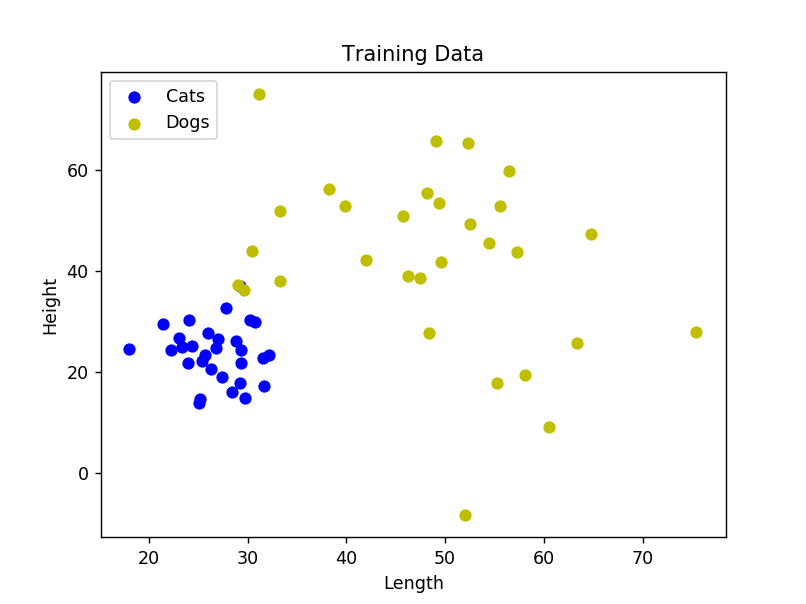

In [4]:
%matplotlib notebook
colours = ['b','y']
p1 = plt.scatter(cats[:,0],cats[:,1], color=colours[0])
p2 = plt.scatter(dogs[:,0],dogs[:,1], color=colours[1])
plt.title('Training Data')
plt.xlabel('Length')
plt.ylabel('Height')
plt.legend((p1,p2), ('Cats','Dogs'), loc=2)
plt.show()

**5. Normalise training data**

In [6]:
together = np.concatenate((cats, dogs))
normalized_cats = (cats - np.mean(together)) / np.std(together)
normalized_dogs = (dogs - np.mean(together)) / np.std(together)


**6. Investigate transformed data**

<IPython.core.display.Javascript object>


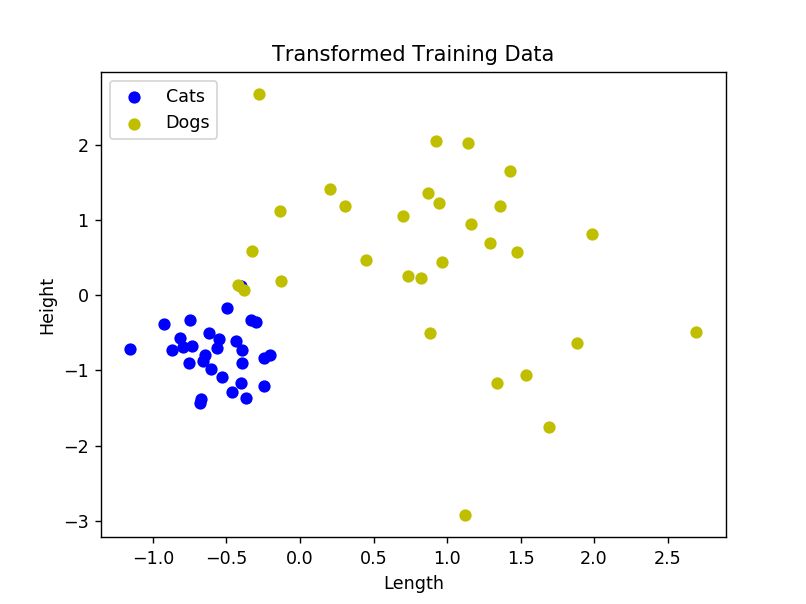

In [7]:
%matplotlib notebook
colours = ['b','y']
p1 = plt.scatter(normalized_cats[:,0],normalized_cats[:,1], color=colours[0])
p2 = plt.scatter(normalized_dogs[:,0],normalized_dogs[:,1], color=colours[1])
plt.title('Transformed Training Data')
plt.xlabel('Length')
plt.ylabel('Height')
plt.legend((p1,p2), ('Cats','Dogs'), loc=2)
plt.show()

**7. Target Values and data preparation**

We will consider **Cats** to be have target value **0** and **Dogs** as **1**. So we will generate a numpy array which will have target value for our training data. Also we will combine the transformed tranining data to form a single numpy array which will ease our calculations.

In [8]:
target_cats = np.zeros(30)
target_dogs = np.ones(30)
y = np.concatenate((target_cats,target_dogs), axis=0)
print('Shape of target value:{}'.format(np.shape(y)))
print('Target values:{}'.format(y))
X = np.concatenate((normalized_cats,normalized_dogs), axis=0)
print('Shape of input value:{}'.format(np.shape(X)))

Shape of target value:(60,)
Target values:[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]
Shape of input value:(60, 2)


**8. Activation function**

For our classification process we will choose Sigmiod as our activation function: $$y = \frac{1}{1+{e}^{-x}}$$

In [10]:
# sigmoid/logit function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# f_derivative will be used in later part of backward propagation
def sigmoid_prime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

**9. Forward propagation**

As mention in the assignment sheet we will take the initial weights *W=[-2.5,-2.5]*.

In [11]:
# Step is to perform a feed forward pass through the network
W = [-2.5,-2.5]
def feed_forward(X, W):
    z1 = np.dot(X,np.transpose(W))
    yhat = sigmoid(z1)
    return yhat, z1

** 10. Loss function and calculation of gradient of the loss w.r.t weight vector**

In [12]:
def loss_function(y,X,W):
    yhat,z1 = feed_forward(X,W)
    J = 0.5*((y-yhat)**2)
    return J

# print('Loss function output : ',loss_function(y,X,W))

In [13]:
def loss_function_prime(y,X,W):
    yhat,z1 = feed_forward(X,W)
    h1 = sigmoid(z1)
    delta = np.multiply(-(y-yhat), sigmoid_prime(z1))
    dJdW = np.dot(h1.T, delta)
    return dJdW, delta
dJdW, delta = loss_function_prime(y,X,W)

# print('Delta: ',delta)
# print('Gradient w.r.t weight: ',dJdW)

**11. Gradient Descent**

In [14]:
# Train ANN

def train_nn(X, y, iter_num, alpha):
    W= np.array([-2.5,-2.5])
    deltaW = 0
    cnt = 0
    m = len(y)
    avg_cost_value = []
    avg_cost = 0
    W1 = W[0]
    W2 = W[1]
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%10 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))

        for i in range(len(y)):
            
            dJdW, delta = loss_function_prime(y[i],X[i,:],W)
            # perform the feed forward pass and return the stored h and z values, to be used in the
            # gradient descent step
            h, z = feed_forward(X[i, :], W)
            
            # loop from nl-1 to 1 backpropagating the errors
            
            avg_cost -= loss_function(y[i],X[i,:],W)
            W[0] = W[0] - alpha*delta
            W[1] = W[1] - alpha * delta
            W_dash = [W[0],W[1]]
        # complete the average cost calculation
            avg_cost = 1.0/m * avg_cost
        avg_cost_value.append(avg_cost)
        cnt += 1
    return W_dash, avg_cost_value

Starting gradient descent for 100 iterations
Iteration 0 of 100
Iteration 10 of 100
Iteration 20 of 100
Iteration 30 of 100
Iteration 40 of 100
Iteration 50 of 100
Iteration 60 of 100
Iteration 70 of 100
Iteration 80 of 100
Iteration 90 of 100


<IPython.core.display.Javascript object>


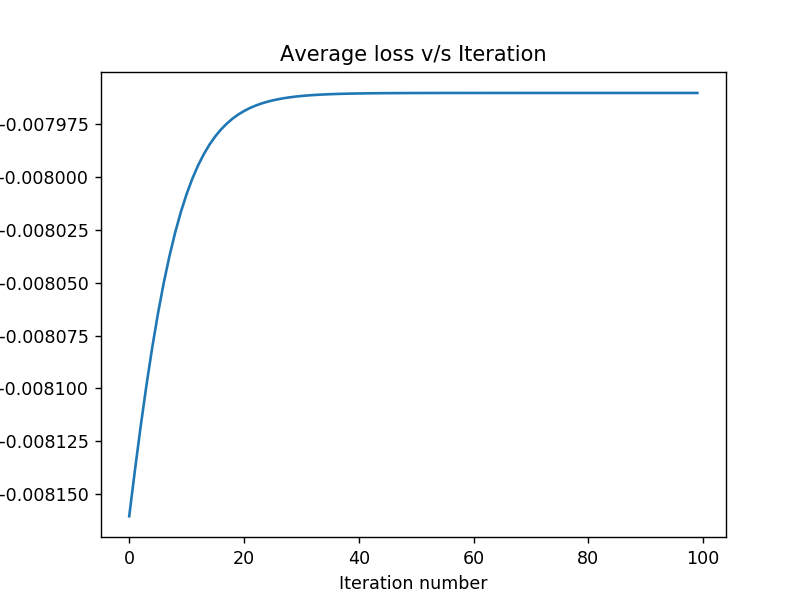

In [15]:
Weights, Loss = train_nn(X,y,100,0.3)
%matplotlib notebook
plt.plot(Loss)
plt.title('Average loss v/s Iteration')
plt.ylabel('Average Loss')
plt.xlabel('Iteration number')
plt.show()